__Introduction__

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B


__Problem__

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

In [14]:
#packages import
import numpy as np
import pandas as pd
from scipy.stats import norm

In [15]:
#data import
AB_df = pd.read_csv("AdSmartABdata.csv")
AB_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [16]:
AB_df.shape

(8077, 9)

In [17]:
# Checking for nulls
total_nulls = AB_df.isnull().sum()
print('Null values:', total_nulls)

Null values: auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


In [19]:
# non-answer observations (both 'yes' and 'no' columns are equal to 0)
AB_df_non = AB_df[(AB_df['yes'] == 0) & (AB_df['no'] == 0)]
AB_df_non

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [21]:
# dropped non-answer observations
AB_df_dropped = AB_df.drop(ABdata_00.index)
print("Observations: {}".format(AB_df_dropped.shape[0]))
AB_df_dropped.head()

Observations: 1243


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [22]:
# Checking for nulls again
AB_df_dropped.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [23]:
#exploring 'experiment' values
AB_df_dropped['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [25]:
control_num = AB_df_dropped['experiment'].value_counts().control
exposed_num = AB_df_dropped['experiment'].value_counts().exposed
control_num, exposed_num

(586, 657)

In [28]:
experiments=AB_df_dropped.groupby('experiment')['yes','no'].sum()
experiments

/var/folders/ky/pck1pvdx5w1dkfmlxqs57pxw0000gn/T/ipykernel_9526/1827048961.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  experiments=AB_df_dropped.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [29]:
experiments_yes = AB_df_dropped.groupby('experiment')['yes'].sum()
experiments_yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [30]:
control_yes = experiments_yes.iloc[0]
exposed_yes = experiments_yes.iloc[1]
control_yes, exposed_yes

(264, 308)

In [31]:
control_rate = control_yes/control_num
exposed_rate = exposed_yes/exposed_num
control_rate, exposed_rate

(0.45051194539249145, 0.4687975646879756)

In [38]:
# Significance Level
alpha = 0.05

In [39]:
p_pooled_hat = (control_yes+exposed_yes)/(control_num+exposed_num)
p_pooled_hat

0.46017699115044247

In [40]:
pooled_variance = p_pooled_hat*(1-p_pooled_hat)*(1/NumberofControl+1/NumberofExposed)
pooled_variance

0.0008020185896747209

In [41]:
# Standard Error
SE = np.sqrt(pooled_variance)
SE

0.028319932727228023

In [42]:
# test statsitics
test_stat = (control_rate - exposed_rate)/SE
test_stat

-0.645680181221037

In [43]:
# critical value using the standard normal distribution
z_crit = norm.ppf(1-alpha/2)
z_crit

1.959963984540054

In [45]:
# Margin of error
me = SE * z_crit
me

0.055506048189964116

In [46]:
# two sided test and using symmetry property of normal distibution so we multiple with 2
p_value = norm.sf(test_stat)*2
p_value

1.4815135017801033

In [48]:
# Confidence Interval
CI = [(control_rate-exposed_rate) - SE * z_crit, (control_rate-exposed_rate) + SE * z_crit]
CI

[-0.07379166748544828, 0.03722042889447995]

In [49]:
print("Test Statistics stat: ", np.round(test_stat, 4))
print("Z-critical: ",  np.round(z_crit, 4))
print("P_value: ",  np.round(p_value, 4))
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,4))

Test Statistics stat:  -0.6457
Z-critical:  1.96
P_value:  1.4815
Confidence Interval of 2 sample Z-test for proportions:  [-0.0738  0.0372]


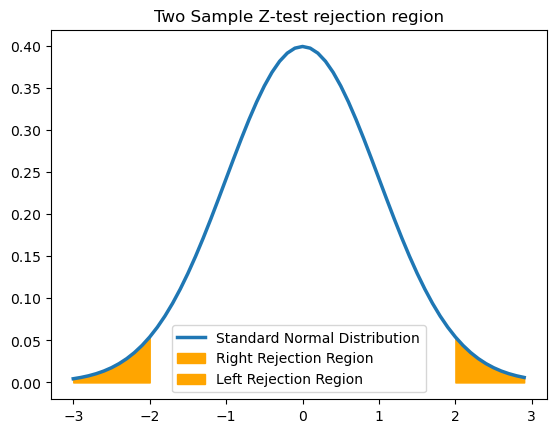

In [50]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',linewidth = 2.5)
plt.fill_between(z[z>z_crit], norm.pdf(z[z>z_crit]), label = 'Right Rejection Region',color ='orange' )
plt.fill_between(z[z<(-1)*z_crit], norm.pdf(z[z<(-1)*z_crit]), label = 'Left Rejection Region',color ='orange' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

In [52]:
if np.abs(test_stat) >= z_crit:
    print(f'Test stat:{round(np.abs(test_stat),4)} >= Z Crit:{round(z_crit,4)}, rejected the null hypothesis')
else:
    print(f'Test stat:{round(np.abs(test_stat),4)} < Z Crit:{round(z_crit,4)}, can not be rejected the null hypothesis')

Test stat:0.6457 < Z Crit:1.96, can not be rejected the null hypothesis
